# Mall Coustomer Clustering

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [7]:
df = pd.read_csv(r"csvs\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])


features = ['Gender','Age','Annual Income', 'Spending Score']
x = df[features]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

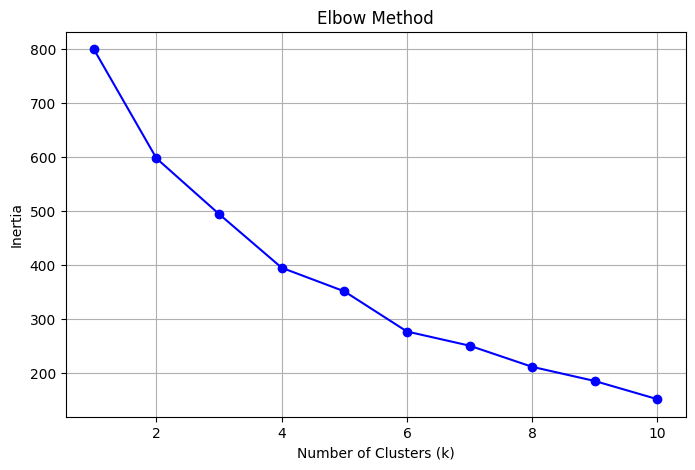

In [19]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

0    2
1    2
2    3
3    3
4    3
Name: Cluster, dtype: int32

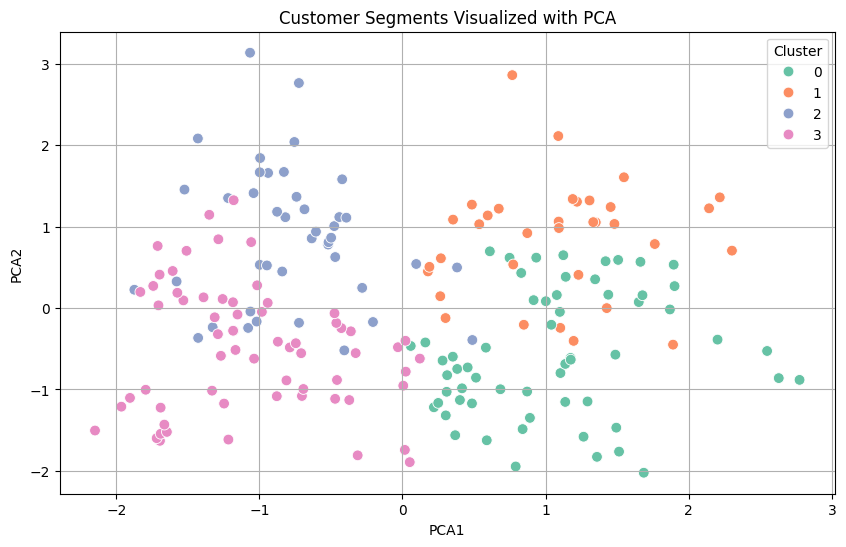

In [30]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)

# Add PCA components to dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=60)
plt.title('Customer Segments Visualized with PCA')
plt.grid(True)
plt.show()
